In [1]:
import pandas as pd
data = pd.read_csv('/content/final_data.csv')
print(data.shape)
print(data.columns)

(4236, 57)
Index(['Unnamed: 0', 'problem', 'level', 'type', 'modified_problem',
       'no_of_equations', 'no_of_variables', 'has_mod', 'has_logarithm',
       'has_fraction', 'has_eq', 'has_neq', 'mod_count', 'log_count',
       'fracs_count', 'eqlts_count', 'neqlts_count', 'max_degree_of_equations',
       'sentence_count', 'word_count', 'words_per_sentence',
       'average_word_length', 'large_words', 'has_repeated_large_words', 'ADJ',
       'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
       'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X',
       'sentence_count_cat', 'word_count_cat', 'words_per_sentence_cat',
       'average_word_length_cat', 'large_words_cat', 'number_of_math_vocab',
       'number_of_digits', 'number_of_numbers', 'has_digits', 'has_symbol',
       'symbol_count', 'has_exp', 'no_of_exps', 'has_pow', 'no_of_pow'],
      dtype='object')


In [2]:
data.drop(columns = ['Unnamed: 0', 'problem', 'type', 'modified_problem','has_mod', 'has_logarithm','has_repeated_large_words',
       'has_fraction', 'has_eq', 'has_neq','sentence_count_cat', 'word_count_cat', 'words_per_sentence_cat',
       'average_word_length_cat', 'large_words_cat','has_digits','has_symbol', 'has_exp','has_pow'], inplace = True)

In [3]:
for i in range(data.shape[0]):
  data['level'][i] = data['level'][i][6]


<ipython-input-3-992cb1e16ca9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = data['level'][i][6]


In [4]:

data['level'] = pd.to_numeric(data['level'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   level                    4236 non-null   int64
 1   no_of_equations          4236 non-null   int64
 2   no_of_variables          4236 non-null   int64
 3   mod_count                4236 non-null   int64
 4   log_count                4236 non-null   int64
 5   fracs_count              4236 non-null   int64
 6   eqlts_count              4236 non-null   int64
 7   neqlts_count             4236 non-null   int64
 8   max_degree_of_equations  4236 non-null   int64
 9   sentence_count           4236 non-null   int64
 10  word_count               4236 non-null   int64
 11  words_per_sentence       4236 non-null   int64
 12  average_word_length      4236 non-null   int64
 13  large_words              4236 non-null   int64
 14  ADJ                      4236 non-null   int64
 15  ADP 

In [6]:
X = data.drop(columns = ['level'])
y = data['level']

In [7]:
data.shape

(4236, 38)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
labels = ["Level 1", "Level 2", "Level 3", "Level 4", "Level 5"]
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(confusion_matrix, labels):
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='Blues')

    # Set labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

    # Set colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set title and labels
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    # Show the plot
    plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluation(y_train_pred, y_test_pred, y_train, y_test, labels):
  print('--------------------------------------------------------------')
  print('--------------------------------------------------------------')
  print("train_evaluation:\n")
  print(classification_report(y_train_pred, y_train))
  print(confusion_matrix(y_train_pred, y_train))
  plot_confusion_matrix(confusion_matrix(y_train_pred, y_train), labels)
  print('--------------------------------------------------------------')
  print("\ntest_evaluation:\n")
  print(classification_report(y_test_pred, y_test))
  print(confusion_matrix(y_test_pred, y_test))
  plot_confusion_matrix(confusion_matrix(y_test_pred, y_test), labels)
  print('--------------------------------------------------------------')
  print('--------------------------------------------------------------')

In [12]:
g = 0
def final(y):
  y_ = []
  for i in range(y.shape[0]):
    f = y[i][0]
    g = 0
    for j in range(1, y.shape[1]):
      if y[i][j] >= f:
        f = y[i][j]
        g = j
    y_.append(g)
  return y_

In [55]:
def club_class(y):
  for i in y.index:
    if y[i] == 1 or y[i] == 2:
      y[i] = 1
    elif y[i] == 3 or y[i] == 4:
      y[i] = 2
    else:
      y[i] = 3

In [56]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

def Neural_Network_model(model, data, standardization = 0, smoting = 0, levels = 5):

  # dividing dependent and independent features
  X = data.drop(columns = ['level'])
  y = data['level']

  # Train - Test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

  # Standardization
  if (standardization == 1):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

  # SMOTE
  if (smoting == 1):
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

  # club classes
  if(levels == 3):
    club_class(y_train)
    club_class(y_test)
    labels_3 = ["Level 1", "Level 2", "Level 3"]
    labels = labels_3
  else:
    labels_5 = ["Level 1", "Level 2", "Level 3", "Level 4", "Level 5"]
    labels = labels_5

  # create columns for each class in the target variable
  y_train_categorical = to_categorical(y_train)
  y_test_categorical = to_categorical(y_test)

  # Drop the first column
  y_train_categorical = y_train_categorical[:, 1:]
  y_test_categorical = y_test_categorical[:, 1:]

  # Fit the model
  model.fit(X_train, y_train_categorical, epochs=10, batch_size=32)

  # Model Prediction
  y_test_pred = model.predict(X_test)
  y_test_pred_ = final(y_test_pred)

  y_train_pred = model.predict(X_train)
  y_train_pred_ = final(y_train_pred)

  y_train_categorical_ = final(y_train_categorical)
  y_test_categorical_ = final(y_test_categorical)

  evaluation(y_train_pred_, y_test_pred_, y_train_categorical_, y_test_categorical_, labels)

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential()
model.add(layers.Dense(80, activation='sigmoid', input_shape=(37,)))
model.add(layers.Dense(50, activation='sigmoid'))
model.add(layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 80)                3040      
                                                                 
 dense_34 (Dense)            (None, 50)                4050      
                                                                 
 dense_35 (Dense)            (None, 5)                 255       
                                                                 
Total params: 7,345
Trainable params: 7,345
Non-trainable params: 0
_________________________________________________________________


#Model on 5 levels

Epoch 1/10
106/106 [==============================] - 2s 4ms/step - loss: 1.5750 - accuracy: 0.2789
Epoch 2/10
106/106 [==============================] - 0s 2ms/step - loss: 1.5015 - accuracy: 0.3108
Epoch 3/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4585 - accuracy: 0.3303
Epoch 4/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4310 - accuracy: 0.3512
Epoch 5/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4183 - accuracy: 0.3492
Epoch 6/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4123 - accuracy: 0.3560
Epoch 7/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4055 - accuracy: 0.3551
Epoch 8/10
106/106 [==============================] - 0s 2ms/step - loss: 1.3981 - accuracy: 0.3633
Epoch 9/10
106/106 [==============================] - 0s 2ms/step - loss: 1.3953 - accuracy: 0.3681
Epoch 10/10
106/106 [==============================] - 0s 1ms/step
---------------------------------

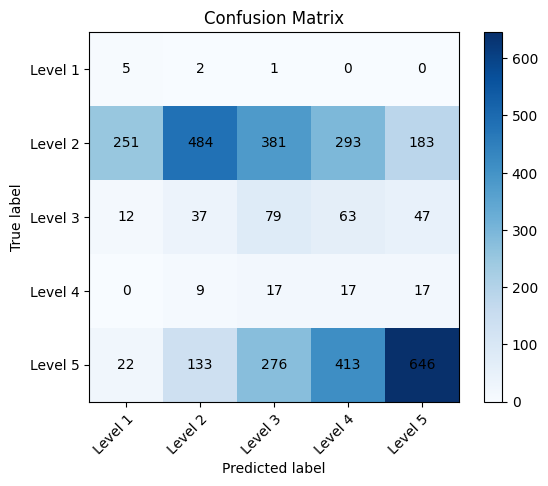

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.67      0.29      0.41       380
           2       0.07      0.25      0.11        53
           3       0.04      0.37      0.06        19
           4       0.74      0.41      0.53       396

    accuracy                           0.35       848
   macro avg       0.30      0.26      0.22       848
weighted avg       0.65      0.35      0.44       848

[[  0   0   0   0   0]
 [ 65 112  96  67  40]
 [  2   6  13  22  10]
 [  0   2   1   7   9]
 [  5  47  79 101 164]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


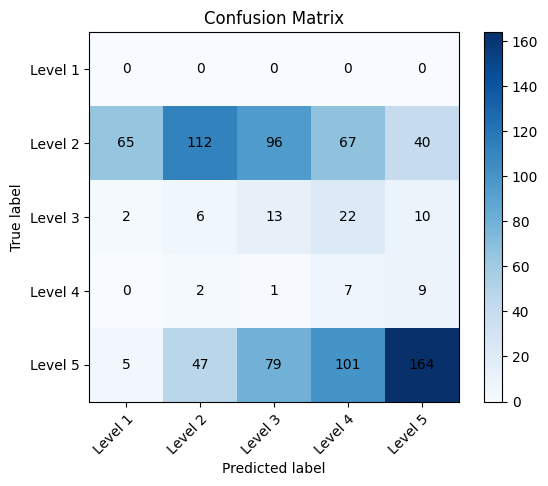

--------------------------------------------------------------
--------------------------------------------------------------


In [44]:
Neural_Network_model(model, data, standardization = 0, smoting = 0)

Epoch 1/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3857 - accuracy: 0.3776
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3713 - accuracy: 0.3814
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3602 - accuracy: 0.3897
Epoch 4/10
140/140 [==============================] - 0s 3ms/step - loss: 1.3492 - accuracy: 0.3962
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3395 - accuracy: 0.4004
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3319 - accuracy: 0.4087
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3240 - accuracy: 0.4177
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3175 - accuracy: 0.4172
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3086 - accuracy: 0.4264
Epoch 10/10
140/140 [==============================] - 0s 1ms/step
---------------------------------

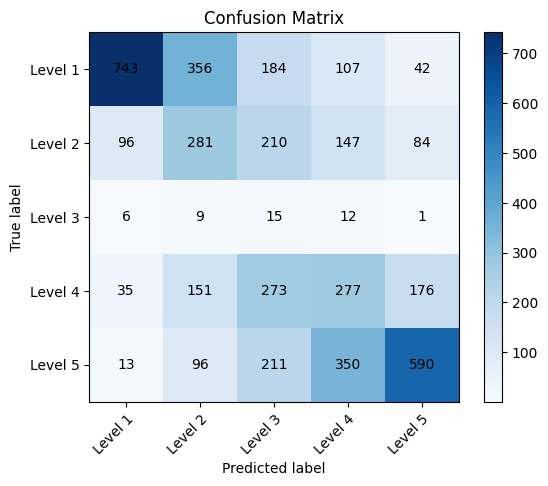

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.53      0.26      0.34       149
           1       0.32      0.32      0.32       168
           2       0.01      0.20      0.02        10
           3       0.31      0.29      0.30       215
           4       0.61      0.44      0.51       306

    accuracy                           0.34       848
   macro avg       0.36      0.30      0.30       848
weighted avg       0.46      0.34      0.39       848

[[ 38  49  36  20   6]
 [ 24  53  34  35  22]
 [  0   2   2   5   1]
 [  7  33  55  62  58]
 [  3  30  62  75 136]]


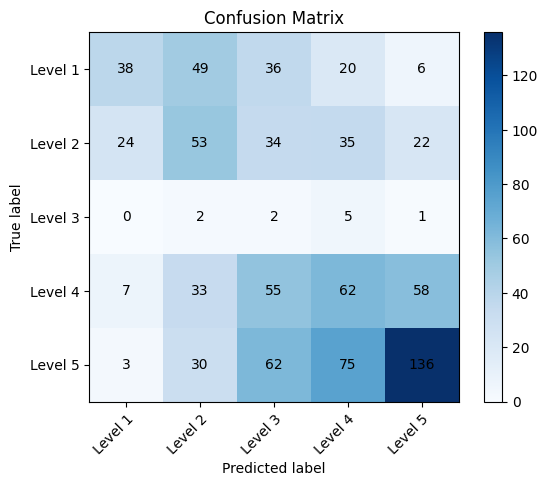

--------------------------------------------------------------
--------------------------------------------------------------


In [45]:
Neural_Network_model(model, data, standardization = 0, smoting = 1)

Epoch 1/10
106/106 [==============================] - 2s 2ms/step - loss: 1.6749 - accuracy: 0.3158
Epoch 2/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4341 - accuracy: 0.3560
Epoch 3/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4222 - accuracy: 0.3592
Epoch 4/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4146 - accuracy: 0.3577
Epoch 5/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4103 - accuracy: 0.3557
Epoch 6/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4075 - accuracy: 0.3589
Epoch 7/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4043 - accuracy: 0.3560
Epoch 8/10
106/106 [==============================] - 0s 3ms/step - loss: 1.4012 - accuracy: 0.3675
Epoch 9/10
106/106 [==============================] - 0s 2ms/step - loss: 1.4024 - accuracy: 0.3728
Epoch 10/10
106/106 [==============================] - 0s 1ms/step
---------------------------------

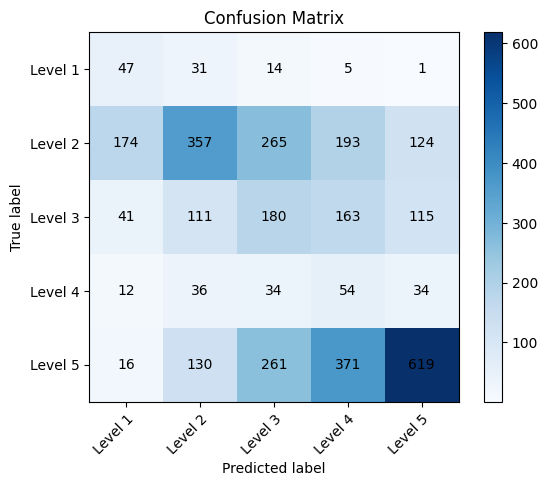

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.12      0.30      0.18        30
           1       0.50      0.31      0.38       274
           2       0.22      0.29      0.25       143
           3       0.04      0.27      0.07        30
           4       0.68      0.41      0.51       371

    accuracy                           0.35       848
   macro avg       0.31      0.31      0.28       848
weighted avg       0.50      0.35      0.40       848

[[  9  13   2   5   1]
 [ 50  84  65  47  28]
 [  8  21  41  38  35]
 [  0   8   6   8   8]
 [  5  41  75  99 151]]


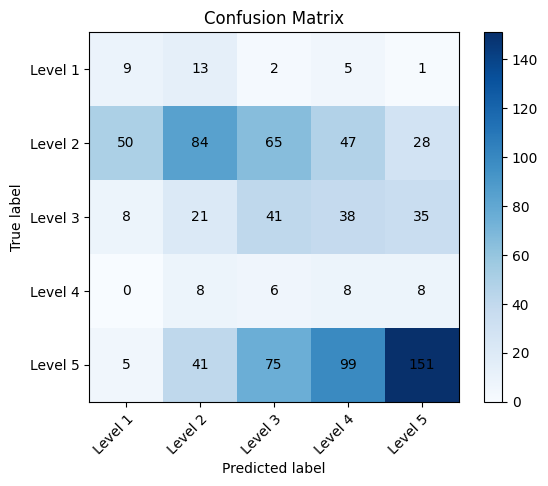

--------------------------------------------------------------
--------------------------------------------------------------


In [46]:
Neural_Network_model(model, data, standardization = 1, smoting = 0)

Epoch 1/10
140/140 [==============================] - 0s 3ms/step - loss: 1.4017 - accuracy: 0.3718
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3982 - accuracy: 0.3686
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3933 - accuracy: 0.3798
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3908 - accuracy: 0.3796
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3869 - accuracy: 0.3819
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3852 - accuracy: 0.3794
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3819 - accuracy: 0.3870
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 1.3819 - accuracy: 0.3751
Epoch 9/10
140/140 [==============================] - 0s 3ms/step - loss: 1.3760 - accuracy: 0.3875
Epoch 10/10
140/140 [==============================] - 0s 1ms/step
---------------------------------

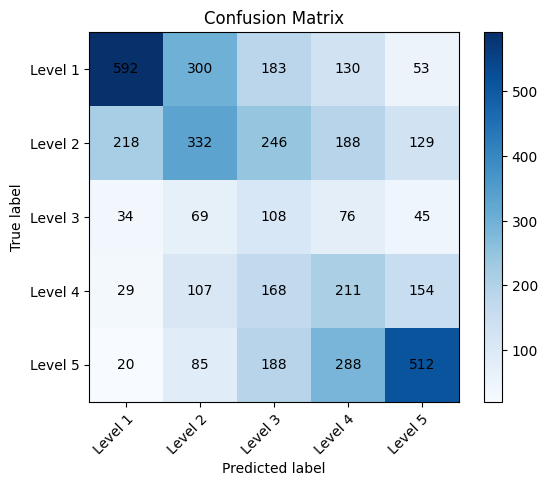

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.56      0.22      0.31       182
           1       0.30      0.26      0.28       192
           2       0.08      0.25      0.13        64
           3       0.24      0.31      0.27       151
           4       0.53      0.46      0.49       259

    accuracy                           0.32       848
   macro avg       0.34      0.30      0.30       848
weighted avg       0.40      0.32      0.34       848

[[ 40  60  42  27  13]
 [ 24  50  44  40  34]
 [  3   9  16  22  14]
 [  2  24  35  47  43]
 [  3  24  52  61 119]]


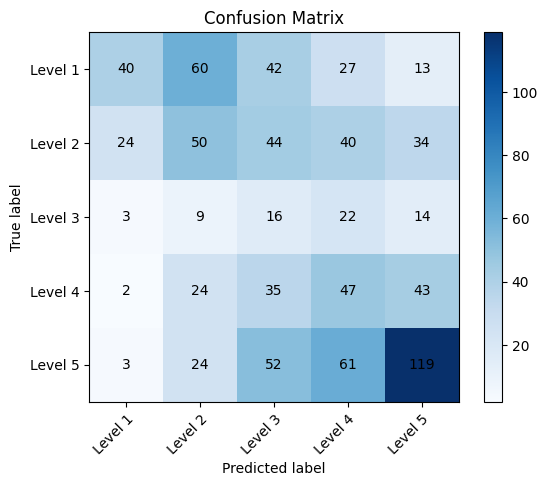

--------------------------------------------------------------
--------------------------------------------------------------


In [47]:
Neural_Network_model(model, data, standardization = 1, smoting = 1)

#Model on 3 levels

In [53]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential()
model.add(layers.Dense(80, activation='sigmoid', input_shape=(37,)))
model.add(layers.Dense(50, activation='sigmoid'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 80)                3040      
                                                                 
 dense_37 (Dense)            (None, 50)                4050      
                                                                 
 dense_38 (Dense)            (None, 3)                 153       
                                                                 
Total params: 7,243
Trainable params: 7,243
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
106/106 [==============================] - 3s 3ms/step - loss: 1.0529 - accuracy: 0.4516
Epoch 2/10
106/106 [==============================] - 0s 2ms/step - loss: 1.0055 - accuracy: 0.4864
Epoch 3/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9633 - accuracy: 0.5032
Epoch 4/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9495 - accuracy: 0.5153
Epoch 5/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9386 - accuracy: 0.5266
Epoch 6/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9333 - accuracy: 0.5307
Epoch 7/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9270 - accuracy: 0.5307
Epoch 8/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9267 - accuracy: 0.5304
Epoch 9/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9218 - accuracy: 0.5381
Epoch 10/10
106/106 [==============================] - 0s 1ms/step
---------------------------------

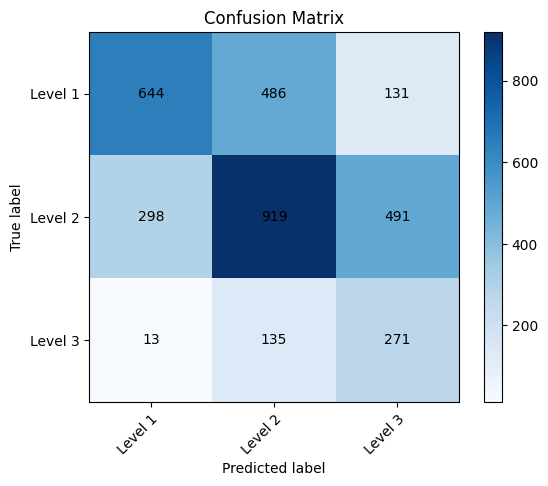

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       289
           1       0.60      0.53      0.56       439
           2       0.31      0.57      0.40       120

    accuracy                           0.54       848
   macro avg       0.52      0.55      0.52       848
weighted avg       0.57      0.54      0.55       848

[[154 110  25]
 [ 78 232 129]
 [  7  44  69]]


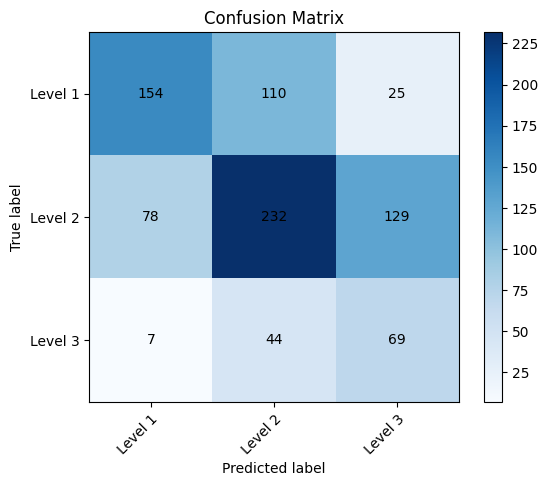

--------------------------------------------------------------
--------------------------------------------------------------


In [57]:
Neural_Network_model(model, data, standardization = 0, smoting = 0, levels = 3)

Epoch 1/10
140/140 [==============================] - 0s 3ms/step - loss: 0.8576 - accuracy: 0.5899
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8467 - accuracy: 0.5966
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8409 - accuracy: 0.6045
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.6060
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.6099
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8212 - accuracy: 0.6103
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.6211
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8078 - accuracy: 0.6244
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8020 - accuracy: 0.6262
Epoch 10/10
140/140 [==============================] - 0s 1ms/step
---------------------------------

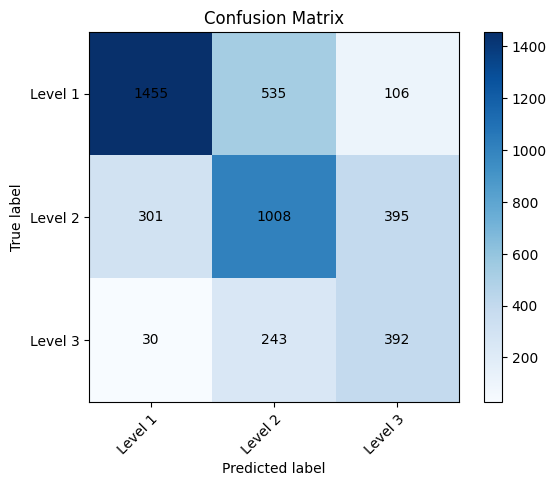

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       288
           1       0.54      0.53      0.54       393
           2       0.39      0.52      0.45       167

    accuracy                           0.53       848
   macro avg       0.53      0.53      0.52       848
weighted avg       0.55      0.53      0.54       848

[[155 108  25]
 [ 73 209 111]
 [ 11  69  87]]


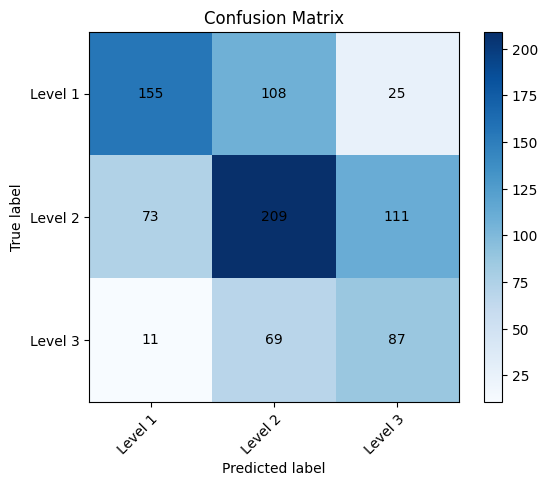

--------------------------------------------------------------
--------------------------------------------------------------


In [58]:
Neural_Network_model(model, data, standardization = 0, smoting = 1, levels = 3)

Epoch 1/10
106/106 [==============================] - 2s 3ms/step - loss: 1.1703 - accuracy: 0.4793
Epoch 2/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9589 - accuracy: 0.5266
Epoch 3/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9484 - accuracy: 0.5280
Epoch 4/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9441 - accuracy: 0.5218
Epoch 5/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9397 - accuracy: 0.5334
Epoch 6/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9411 - accuracy: 0.5310
Epoch 7/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9365 - accuracy: 0.5298
Epoch 8/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9348 - accuracy: 0.5274
Epoch 9/10
106/106 [==============================] - 0s 2ms/step - loss: 0.9357 - accuracy: 0.5224
Epoch 10/10
106/106 [==============================] - 0s 2ms/step
---------------------------------

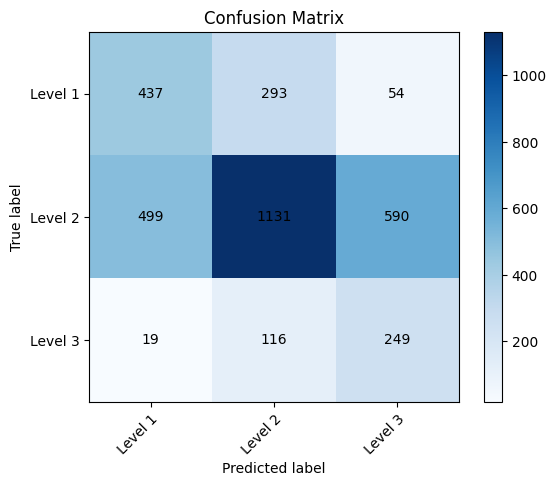

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.50      0.60      0.54       198
           1       0.72      0.51      0.60       548
           2       0.24      0.53      0.33       102

    accuracy                           0.53       848
   macro avg       0.49      0.55      0.49       848
weighted avg       0.61      0.53      0.55       848

[[119  68  11]
 [112 278 158]
 [  8  40  54]]


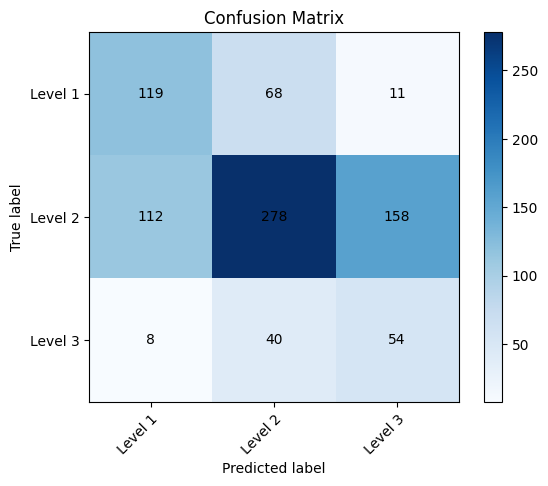

--------------------------------------------------------------
--------------------------------------------------------------


In [59]:
Neural_Network_model(model, data, standardization = 1, smoting = 0, levels = 3)

Epoch 1/10
140/140 [==============================] - 0s 3ms/step - loss: 0.8887 - accuracy: 0.5709
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 0.5745
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.5736
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8792 - accuracy: 0.5785
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8791 - accuracy: 0.5727
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8744 - accuracy: 0.5758
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.5763
Epoch 8/10
140/140 [==============================] - 1s 4ms/step - loss: 0.8742 - accuracy: 0.5772
Epoch 9/10
140/140 [==============================] - 0s 3ms/step - loss: 0.8692 - accuracy: 0.5821
Epoch 10/10
140/140 [==============================] - 0s 2ms/step
---------------------------------

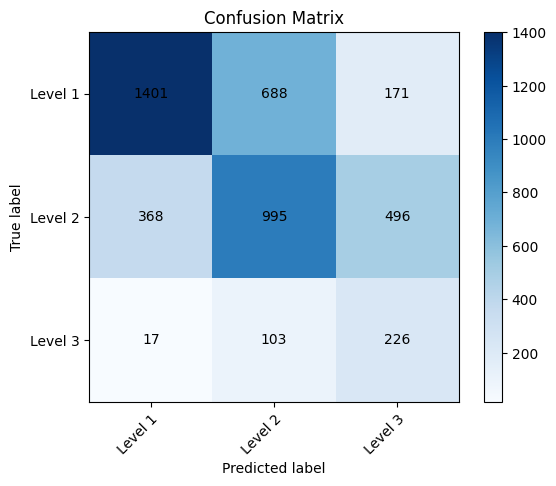

--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       0.69      0.48      0.57       339
           1       0.55      0.51      0.53       420
           2       0.21      0.52      0.29        89

    accuracy                           0.50       848
   macro avg       0.48      0.50      0.46       848
weighted avg       0.57      0.50      0.52       848

[[164 137  38]
 [ 67 214 139]
 [  8  35  46]]


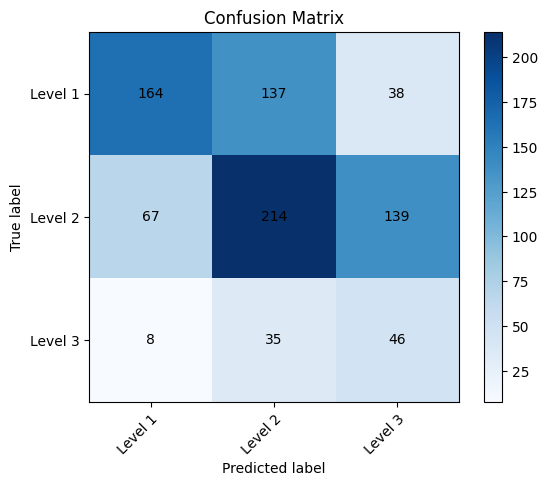

--------------------------------------------------------------
--------------------------------------------------------------


In [60]:
Neural_Network_model(model, data, standardization = 1, smoting = 1, levels = 3)